<a href="https://colab.research.google.com/github/elleish/3D-barcode-generator/blob/main/3Dbarcode_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ghostscript
!pip install treepoem
!pip install elasticdeform

In [ ]:
import os
import numpy as np
import treepoem, imageio, elasticdeform
from PIL import Image, ImageDraw, ImageFont
from shutil import make_archive
import matplotlib.pyplot as plt
%matplotlib inline
os.mkdir('barcodes')

In [33]:

X = numpy.zeros((400, 500), dtype=np.uint8)
X[::20, :] = 255.0
X[:, ::20] = 255.0

# apply deformation with a random 3 x 3 grid
X_deformed = elasticdeform.deform_random_grid(X, sigma=5, points=2)

X = Image.fromarray(X).convert('RGB')
X.save('barcodes/test_X.png')
X_deformed = Image.fromarray(X_deformed).convert('RGB')
X_deformed.save('barcodes/test_X_deformed.png')


<ipython-input-57-2491da628682>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  st = ''.join([str(digit) for digit in list(np.random.random_integers(10,size=12)-[1,1,1,1,1,1,1,1,1,1,1,1])])


array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.05669788,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.05682591,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.0572091 ,  0.        ,  0.        ],
        ...,
        [-1.31848337,  0.        ,  0.        ],
        [ 0.30226794,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

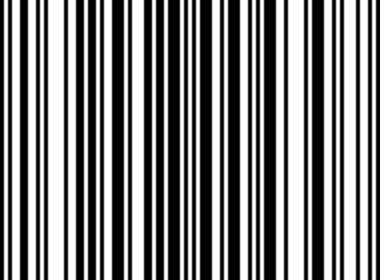

<ipython-input-57-2491da628682>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  st = ''.join([str(digit) for digit in list(np.random.random_integers(10,size=12)-[1,1,1,1,1,1,1,1,1,1,1,1])])


array([[[  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,  -0.57419206],
        [  0.        ,   0.        ,   0.14140419],
        [  0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,  -0.57402763],
        [  0.        ,   0.        ,   0.14136493],
        [  0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,  -0.5735389 ],
        [  0.        ,   0.        ,   0.14124824],
        [  0.        ,   0.        ,   0.        ]],

       ...,

      

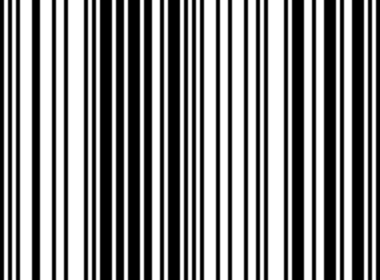

<ipython-input-57-2491da628682>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  st = ''.join([str(digit) for digit in list(np.random.random_integers(10,size=12)-[1,1,1,1,1,1,1,1,1,1,1,1])])


array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        , -0.15506897],
        [ 0.        ,  0.        ,  0.62518483],
        [ 0.        ,  0.        , 53.0079638 ],
        ...,
        [54.50313933,  0.        ,  0.        ],
        [ 0.77912627,  0.        ,  0.        ],
        [-0.19305847,  0.        ,  0.        ]],

       [[ 0.        ,  0.        , -0.15202339],
        [ 0.        ,  0.        ,  0.61260325],
        [ 0.        ,  0.        , 52.87121151],
        ...,
        [54.60225885,  0.        ,  0.        ],
        [ 0.78859517,  0.        ,  0.        ],
        [-0.19530341,  0.        ,  0.        ]],

       ...,

       [[ 0.        ,  0.        ,  0.        ],
        [ 0

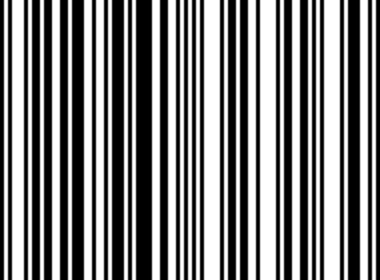

<ipython-input-57-2491da628682>:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  st = ''.join([str(digit) for digit in list(np.random.random_integers(10,size=12)-[1,1,1,1,1,1,1,1,1,1,1,1])])


array([[[ 0.00000000e+00,  0.00000000e+00,  1.26573252e+01],
        [ 0.00000000e+00,  0.00000000e+00,  1.18911448e+02],
        [ 0.00000000e+00,  0.00000000e+00,  2.14772477e+02],
        ...,
        [ 0.00000000e+00, -9.93910194e-01,  0.00000000e+00],
        [ 0.00000000e+00,  1.70335883e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  1.26518313e+01],
        [ 0.00000000e+00,  0.00000000e+00,  1.18893469e+02],
        [ 0.00000000e+00,  0.00000000e+00,  2.14768112e+02],
        ...,
        [ 0.00000000e+00, -9.92909777e-01,  0.00000000e+00],
        [ 0.00000000e+00,  1.70077926e-01,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  1.26353791e+01],
        [ 0.00000000e+00,  2.96871832e-01,  1.18839593e+02],
        [ 0.00000000e+00, -1.28840905e+00,  2.14755028e+02],
        ...,
        [ 0.00000000e+00, -9.89925873e-01,

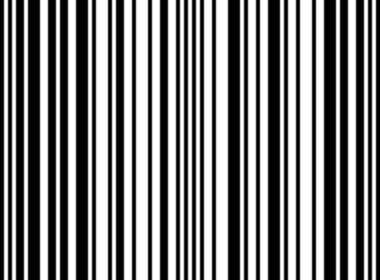

In [57]:
for imgno in range(4):
    st = ''.join([str(digit) for digit in list(np.random.random_integers(10,size=12)-[1,1,1,1,1,1,1,1,1,1,1,1])])
    barcode = treepoem.generate_barcode(
     barcode_type='ean13',  # One of the BWIPP supported codes.
     data=st)
    barcode_img = barcode.crop((0, 0, 190, 140)).resize((380, 280))
    barcode = np.array(barcode_img)
    barcode2 = barcode / 256.0
    barcode_distorted = elasticdeform.deform_random_grid(barcode2, sigma=2, points=3)
    barcode_distorted *= 225
    barcode_distorted2 = barcode_distorted.astype(np.uint8)



    barcode_distorted2 = Image.fromarray(barcode_distorted2).convert('RGB')
    barcode_distorted2.save('barcodes/'+st+'.png')
    display(barcode_distorted)
    display(barcode_img.convert('RGB'))



In [ ]:
# проверка качества генерации (сверка с 1 и 1.41428)
# for j in range(shape[1]-1):
#     for i in range(shape[0]-1):
#         if np.abs(l2(i,j,i,j+1)-1.0)>0.01:
#            print(i,j,l2(i,j,i,j+1))

#         if np.abs(l2(i,j,i+1,j)-1.0)>0.01:
#            print(i,j,l2(i,j,i+1,j))

#         if np.abs(l2(i,j,i+1,j+1)/1.4142-1.0)>0.01:
#            print(i,j,l2(i,j,i+1,j+1)/1.4142)


In [ ]:
!zip barcodes ean13/*.png